In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Podobieństwo słów

In [ ]:
# Dwa dokumenty tekstowe
doc1 = "kosmos galaktyka planeta gwiazda"
doc2 = "galaktyka planeta kometa"

# Tworzenie wektorów liczbowych na podstawie słów
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform([doc1, doc2]).toarray()

# Wyświetlenie słownika (unikalnych słów) i ich reprezentacji wektorowej
print("Słownik:", vectorizer.get_feature_names_out())
print("Wektory dokumentów:")
print(vectors)

# Wyciąganie wektorów liczbowych dla każdego dokumentu
x = vectors[0]
y = vectors[1]

# Obliczanie iloczynu skalarnego oraz normy wektorów
dot_product = np.dot(x, y)
norm_x = np.linalg.norm(x)
norm_y = np.linalg.norm(y)

# Kosinusowa miara podobieństwa
similarity = dot_product / (norm_x * norm_y)

# Wynik
print(f"Iloczyn skalarny x i y: {dot_product}")
print(f"Długość wektora x: {norm_x}")
print(f"Długość wektora y: {norm_y}")
print(f"Podobieństwo dokumentów: {similarity:.2f}")

Słownik: ['galaktyka' 'gwiazda' 'kometa' 'kosmos' 'planeta']
Wektory dokumentów:
[[1 1 0 1 1]
 [1 0 1 0 1]]
Iloczyn skalarny x i y: 2
Długość wektora x: 2.0
Długość wektora y: 1.7320508075688772
Podobieństwo dokumentów: 0.58


# Klasteryzacja

In [ ]:

SP500_DATA_CSV = 'sp500_data (1).csv.gz'
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

                 XOM       CVX
1993-01-29 -0.016991  0.072921
1993-02-01  0.016991  0.102089
1993-02-02  0.084954  0.029168
1993-02-03  0.067964  0.058337
1993-02-04  0.034378  0.044272
                 XOM       CVX  cluster
2011-01-03  0.736805  0.240681        1
2011-01-04  0.168668 -0.584516        0
2011-01-05  0.026631  0.446985        1
2011-01-06  0.248558 -0.919751        0
2011-01-07  0.337329  0.180511        1
        XOM       CVX
0 -0.286422 -0.492965
1  0.325846  0.449970
2 -1.123045 -1.718845
3  1.092072  1.581077


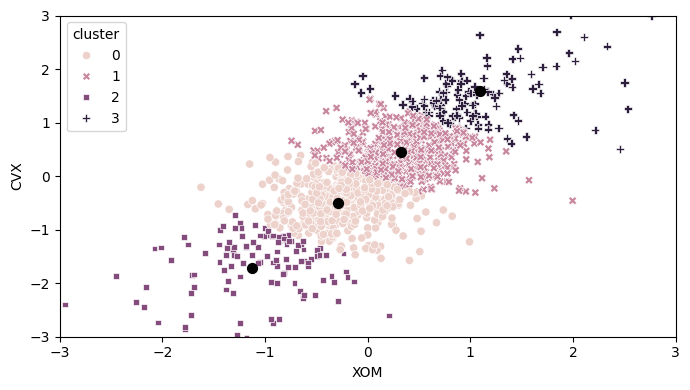

In [ ]:
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)
oil_px = sp500_px[['XOM', 'CVX']]
print(oil_px.head())

df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
kmeans = KMeans(n_clusters=4, n_init='auto').fit(df)
df['cluster'] = kmeans.labels_
print(df.head())

centers = pd.DataFrame(kmeans.cluster_centers_, columns=['XOM', 'CVX'])
print(centers)

fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.scatterplot(x='XOM', y='CVX', hue='cluster', style='cluster',
                     ax=ax, data=df)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='XOM', y='CVX', ax=ax, s=50, color='black')

plt.tight_layout()
plt.show()

# Hierachiczne klasterowanie

In [ ]:
syms1 = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD',
         'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', syms1].transpose()

Z = linkage(df, method='complete')
print(Z.shape)

(17, 4)


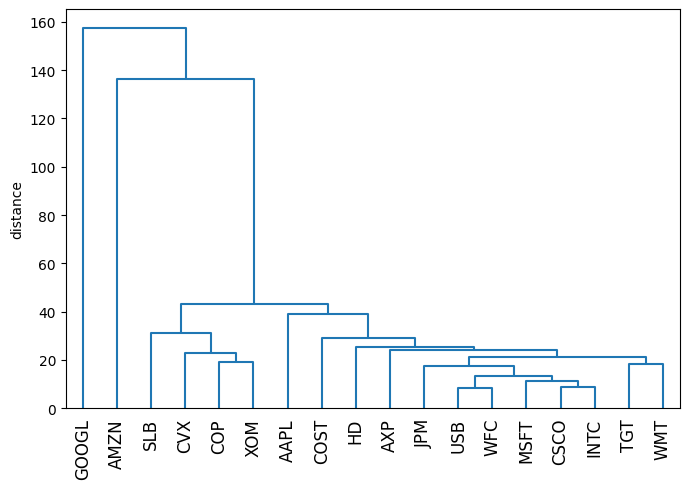

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
dendrogram(Z, labels=list(df.index), color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

plt.tight_layout()
plt.show()

In [ ]:
memb = fcluster(Z, 4, criterion='maxclust')
memb = pd.Series(memb, index=df.index)
for key, item in memb.groupby(memb):
    print(f"{key} : {', '.join(item.index)}")

1 : COP, CVX, SLB, XOM
2 : AAPL, AXP, COST, CSCO, HD, INTC, JPM, MSFT, TGT, USB, WFC, WMT
3 : AMZN
4 : GOOGL


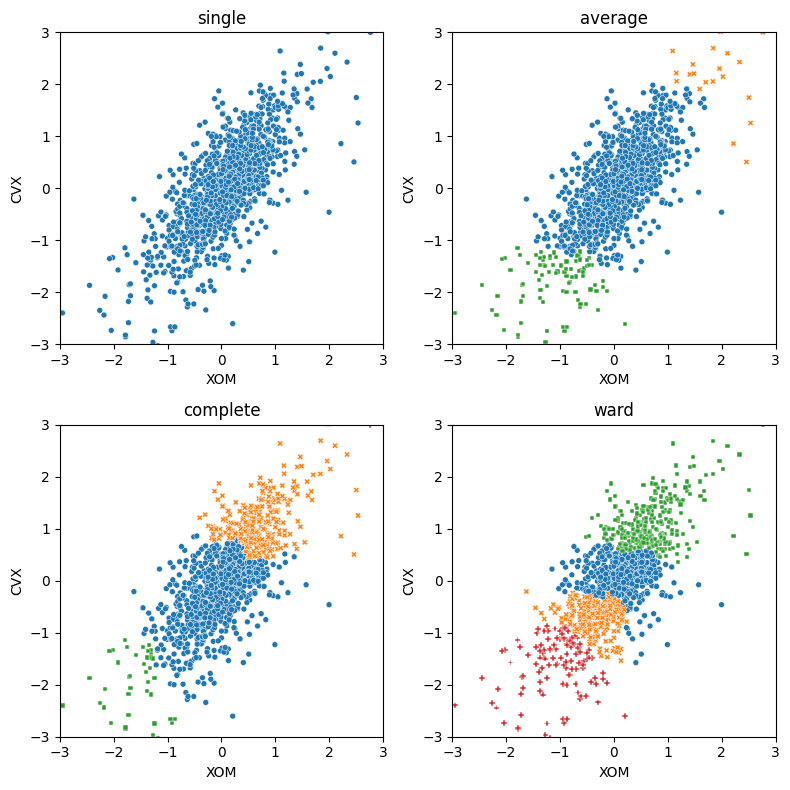

In [ ]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for i, method in enumerate(['single', 'average', 'complete', 'ward']):
    ax = axes[i // 2, i % 2]
    Z = linkage(df, method=method)
    colors = [f'C{c+1}' for c in fcluster(Z, 4, criterion='maxclust')]
    ax = sns.scatterplot(x='XOM', y='CVX', hue=colors, style=colors,
                         size=0.5, ax=ax, data=df, legend=False)

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(method)

plt.tight_layout()
plt.show()